## Runing Sensitivity and uncertainty analysis in UTOPIA using the monaco Monte Carlo framework 
#### (https://monaco.readthedocs.io/en/latest/)

### Import the necessary libraries

In [1]:
from utopia.monte_carlo.montecarlo_analysis import run_mc_analysis
from utopia.utopia import utopiaModel
import numpy as np
import scipy.stats as st

### Load the default configuration and data from the 'data' folder.


In [2]:
data_data = utopiaModel.load_json_file("data/default_data.json")
config_data = utopiaModel.load_json_file("data/default_config.json")


### Define the parameter distributions for the Monte Carlo simulation.


In [3]:
# Define the parameters that you want to sample from the input parameters included on the data loaded from the default data file and select a distribution for each parameter.
param_distributions = {
    "MPdensity_kg_m3": ("lognorm", {"s": 0.05, "scale": np.exp(np.log(data_data["MPdensity_kg_m3"]) - (0.05**2) / 2)}),
    "FI": ("uniform", {"loc": 0.0, "scale": 1.0}),
    "t_half_deg_free": ("lognorm", {"s": 0.05, "scale": np.exp(np.log(data_data["t_half_deg_free"]) - (0.05**2) / 2)}),
    "t_frag_gen_FreeSurfaceWater": ("lognorm", {"s": 0.05, "scale": np.exp(np.log(data_data["t_frag_gen_FreeSurfaceWater"]) - (0.05**2) / 2)})
}

In [4]:
# Run the Monte Carlo analysis with the specified parameters distributions and number of cases.

sim= run_mc_analysis(
    base_config=config_data,
    base_data=data_data,
    n_cases=100,
    param_distributions=param_distributions
)



Running 'UTOPIA_MC_simulation' Monte Carlo simulation with 100/100 cases...
Drawing random samples for 4 input variables via the 'SampleMethod.SOBOL_RANDOM' method... Done
Generating cases... Done


Postprocessing cases: 100%|██████████| 100/100 [00:00<00:00, 16503.91 cases/s]

Simulation complete! Runtime: 0:05:53.440157


### Optional: Export the output variables from the simulation to a file.


In [5]:

import os

output_dir = "UTOPIA_MC_simulation_results"
if not os.path.exists(output_dir):
	os.makedirs(output_dir)

sim.exportOutVars()

Exporting InVar draws to file...
OutVar nums saved in 'UTOPIA_MC_simulation_outvarnums.json'


### Plot sensitivity indices for each output variable.  Monaco uses the D-VARS approach to calculating global sensitivity indices.

In [6]:
sim.outvars

{'residence_time_mass': <monaco.mc_var.OutVar at 0x1f574d0c750>,
 'residence_time_number': <monaco.mc_var.OutVar at 0x1f5748c0cd0>,
 'persistence_mass': <monaco.mc_var.OutVar at 0x1f574944b10>,
 'persistence_number': <monaco.mc_var.OutVar at 0x1f540f1f950>,
 'C_g_m3_Ocean_Surface_Water': <monaco.mc_var.OutVar at 0x1f5748c0c50>}

Calculating sensitivity indices for 'C_g_m3_Ocean_Surface_Water'...
Calculating optimal hyperparameters Φ for 'C_g_m3_Ocean_Surface_Water' covariances...
Done calculating optimal hyperparameters.
Done calculating sensitivity indices.


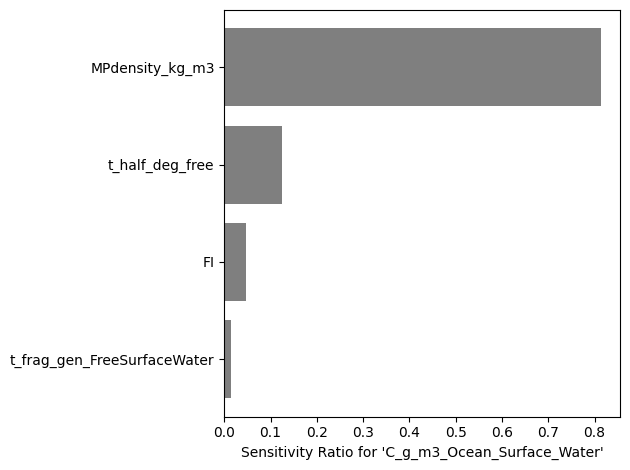

In [7]:
sim.calcSensitivities("C_g_m3_Ocean_Surface_Water")
fig, ax = sim.outvars["C_g_m3_Ocean_Surface_Water"].plotSensitivities()

Calculating sensitivity indices for 'persistence_number'...
Calculating optimal hyperparameters Φ for 'persistence_number' covariances...
Done calculating optimal hyperparameters.
Done calculating sensitivity indices.


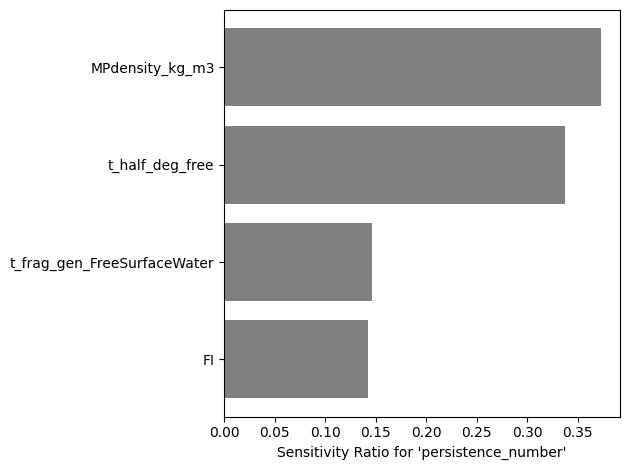

In [8]:
sim.calcSensitivities("persistence_number")
fig, ax = sim.outvars["persistence_number"].plotSensitivities()

Variable: residence_time_mass
Calculating sensitivity indices for 'residence_time_mass'...
Calculating optimal hyperparameters Φ for 'residence_time_mass' covariances...
Done calculating optimal hyperparameters.
Done calculating sensitivity indices.


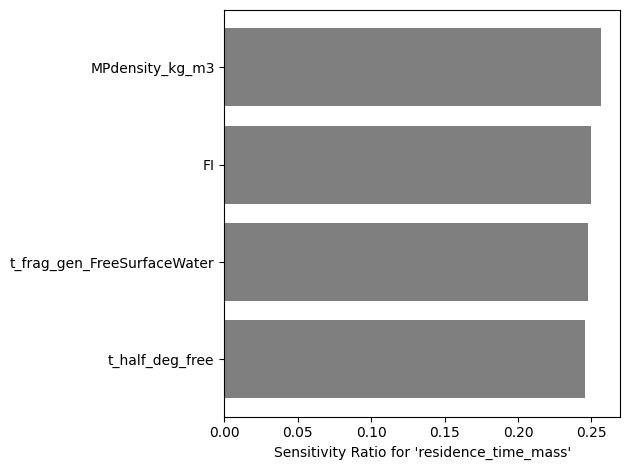

Variable: residence_time_number
Calculating sensitivity indices for 'residence_time_number'...
Calculating optimal hyperparameters Φ for 'residence_time_number' covariances...
Done calculating optimal hyperparameters.
Done calculating sensitivity indices.


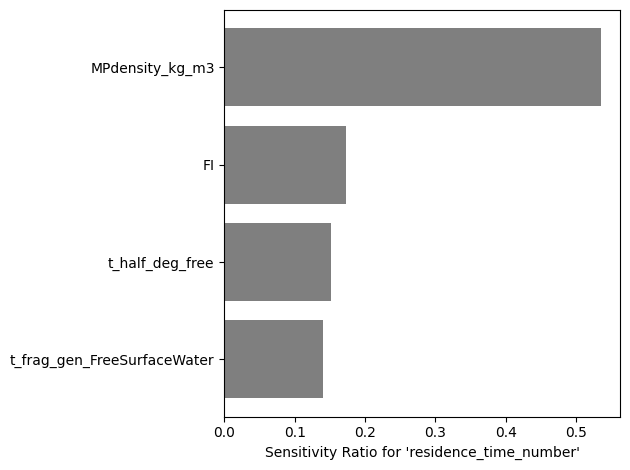

Variable: persistence_mass
Calculating sensitivity indices for 'persistence_mass'...
Calculating optimal hyperparameters Φ for 'persistence_mass' covariances...
Done calculating optimal hyperparameters.
Done calculating sensitivity indices.


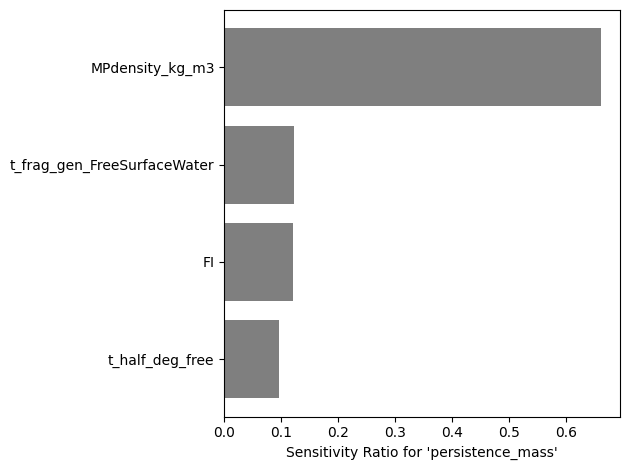

Variable: persistence_number
Calculating sensitivity indices for 'persistence_number'...
Calculating optimal hyperparameters Φ for 'persistence_number' covariances...
Done calculating optimal hyperparameters.
Done calculating sensitivity indices.


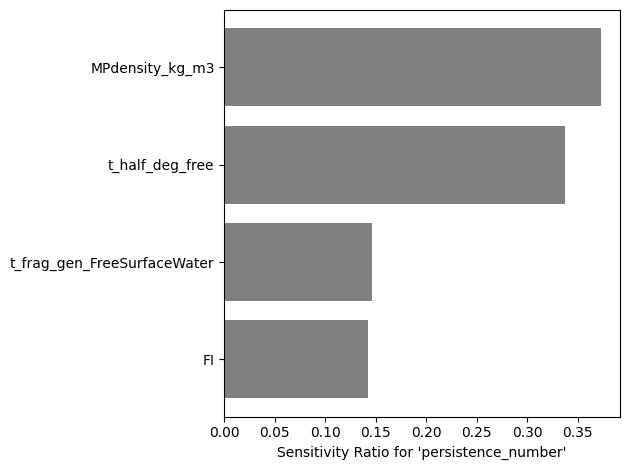

Variable: C_g_m3_Ocean_Surface_Water
Calculating sensitivity indices for 'C_g_m3_Ocean_Surface_Water'...
Calculating optimal hyperparameters Φ for 'C_g_m3_Ocean_Surface_Water' covariances...
Done calculating optimal hyperparameters.
Done calculating sensitivity indices.


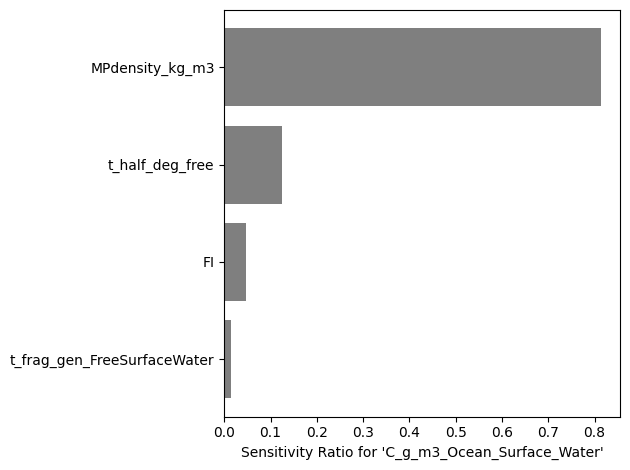

In [9]:
import matplotlib.pyplot as plt

for var in sim.outvars:
    print(f"Variable: {var}")
    sim.calcSensitivities(var)
    fig, ax = sim.outvars[var].plotSensitivities()

    plt.show()

### Plot 

(<Figure size 640x480 with 3 Axes>,
 (<Axes: xlabel='MPdensity_kg_m3'>,
  <Axes: ylabel='residence_time_number'>,
  <Axes: >))

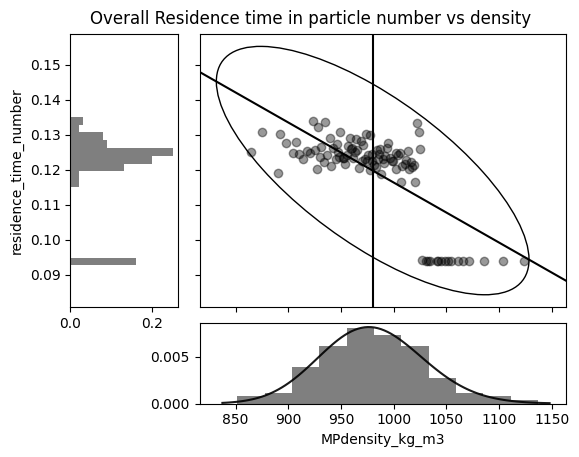

In [10]:
import monaco as mc

mc.multi_plot([sim.invars["MPdensity_kg_m3"],sim.outvars["residence_time_number"]],title="Overall Residence time in particle number vs density",cov_plot=True)

(<Figure size 640x480 with 3 Axes>,
 (<Axes: xlabel='MPdensity_kg_m3'>,
  <Axes: ylabel='C_g_m3_Ocean_Surface_Water'>,
  <Axes: >))

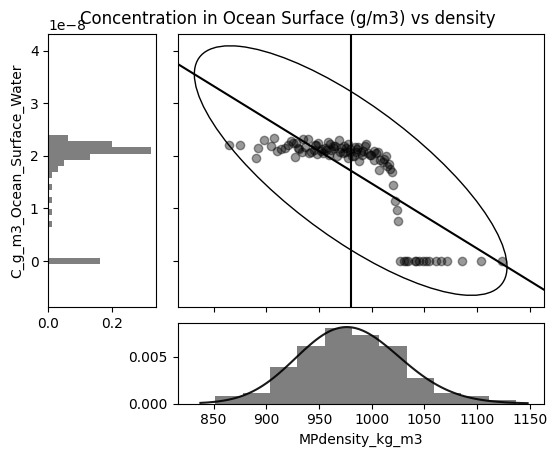

In [11]:

mc.multi_plot([sim.invars["MPdensity_kg_m3"],sim.outvars["C_g_m3_Ocean_Surface_Water"]],title="Concentration in Ocean Surface (g/m3) vs density",cov_plot=True)